In [1]:
### Module 0: Importing Libraries
import pandas as pd
import numpy as np
import pprint
import os 
from time import time 
from dotenv import load_dotenv
import json
import argparse
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI
import certifi

## Importing VE libraries
from utils import *
from dataset_utils import read_wikiqa_data
from prompt_helper import get_joint_prompt_helper, normalize_prediction
from dataset_utils import read_wikiqa_data, wiki_evaluation
# Override bad SSL_CERT_FILE if set
os.environ["SSL_CERT_FILE"] = certifi.where()

In [2]:
def _parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--style', type=str, default="e-p")
    parser.add_argument('--annotation', type=str, default="std")
    parser.add_argument('--run_prediction', default=False, action='store_true')
    parser.add_argument('--num_shot', type=int, default=5)
    parser.add_argument('--train_slice', type=int, default=0)
    parser.add_argument('--num_dev', type=int, default=3)
    parser.add_argument('--dev_slice', type=int, default=0)
    parser.add_argument('--show_result', default=False, action='store_true')
    parser.add_argument('--model', type=str, default="gpt3.5")
    parser.add_argument('--temperature', type=float, default=0.7)
    parser.add_argument('--plot_consistency', default=False, action='store_true')
    parser.add_argument('--engine', type=str, default="gpt-3.5-turbo-0125")
    parser.add_argument('--run_length_test', default=False)

    args, _ = parser.parse_known_args()
    args.helper = get_joint_prompt_helper(args.style)
    return args

In [3]:
args = _parse_args()
args

Namespace(style='e-p', annotation='std', run_prediction=False, num_shot=5, train_slice=0, num_dev=3, dev_slice=0, show_result=False, model='gpt3.5', temperature=0.7, plot_consistency=False, engine='gpt-3.5-turbo-0125', run_length_test=False, helper=<prompt_helper.JointEandPPromptHelper object at 0x310cd1a30>)

In [4]:
from consistency import test_few_shot_manual_prediction as consistency_test_few_shot_manual_prediction

Running prediction
7 not found
prompt: 

Question: Who lived longer, Theodor Haecker or Harry Vaughan Watkins? 
A: Are follow up questions needed here: Yes.
Follow up: How old was Theodor Haecker when he died?
Intermediate answer: Theodor Haecker was 65 years old when he died.
Follow up: How old was Harry Vaughan Watkins when he died?
Intermediate answer: Harry Vaughan Watkins was 69 years old when he died.
So the final answer is: Harry Vaughan Watkins.
Question: Why did the founder of Versus die?
A: Are follow up questions needed here: Yes. 
Follow up: Who founded Versus? 
Intermediate answer: Gianni Versace.
Follow up: Why did Gianni Versace die?
Intermediate answer: Gianni Versace was shot and killed on the steps of his Miami Beach mansion on July 15, 1997.
So the final answer is: Shot.
Question: Who is the grandchild of Dambar Shah?
A: Are follow up questions needed here: Yes.
Follow up: Who is the child of Dambar Shah?
Intermediate answer: Dambar Shah (? - 1645) was the king of th

Verifying: 100%|██████████| 3/3 [00:00<00:00, 12545.28it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:1

--------------0 EX False RAT False F1 0.00 CONS 0.20--------------
question:  Where was the performer of song Get A Life – Get Alive born?
0: Are follow up questions needed here: Yes.
Follow up: Who is the performer of the song Get A Life - Get Alive?
Intermediate answer: The performer of the song Get A Life - Get Alive is George McCrae.
Follow up: Where was George McCrae born?
Intermediate answer: George McCrae was born in West Palm Beach, Florida, United States. | West Palm Beach, Florida, United States
1: Are follow up questions needed here: Yes.
Follow up: Who is the performer of the song "Get A Life - Get Alive"?
Intermediate answer: The performer of the song "Get A Life - Get Alive" is Inner Circle.
Follow up: Where was Inner Circle born?
Intermediate answer: Inner Circle was formed in Kingston, Jamaica. | Kingston, Jamaica
2: Are follow up questions needed here: Yes.
Follow up: Who is the performer of the song Get A Life - Get Alive?
Intermediate answer: The performer of the son

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jiteshsingla/Documents/MS Research Final Topic/Implementation/VE_implementation_self_ask/log/consistency_2.png'

<Figure size 1000x500 with 0 Axes>

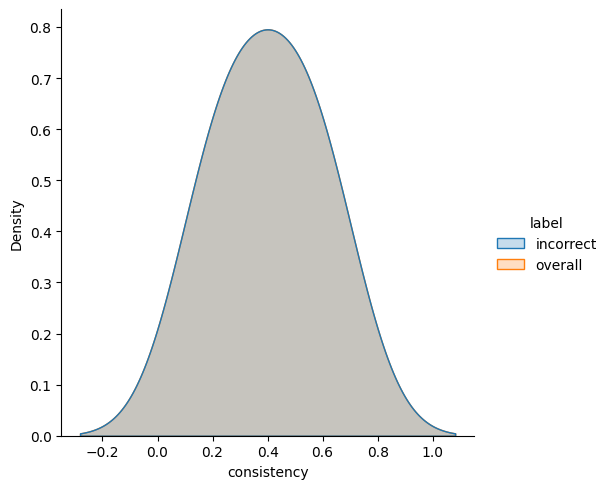

In [5]:
consistency_test_few_shot_manual_prediction(args)

In [10]:
predictions =  [{"responses": ["Are follow up questions needed here: Yes.\nFollow up: Who performed the song Get A Life - Get Alive?\nIntermediate answer: Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul was formed in London, England.\nSo the final answer is: London, England.", "Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song Get A Life \u2013 Get Alive?\nIntermediate answer: The performer of the song Get A Life \u2013 Get Alive is Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul is a British group formed in London, England.\nSo the final answer is: London, England.", "Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song \"Get A Life - Get Alive\"?\nIntermediate answer: The performer of the song \"Get A Life - Get Alive\" is John Maus.\nFollow up: Where was John Maus born?\nIntermediate answer: John Maus was born in Austin, Minnesota, United States.\nSo the final answer is: United States.", "Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song Get A Life - Get Alive?\nIntermediate answer: The performer of the song Get A Life - Get Alive is Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul is a British musical collective formed in London, England.\nSo the final answer is: London, England.", "Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song Get A Life - Get Alive?\nIntermediate answer: The performer of the song Get A Life - Get Alive is Suggs.\nFollow up: Where was Suggs born?\nIntermediate answer: Suggs was born in Hastings, East Sussex, England.\nSo the final answer is: Hastings, East Sussex, England."], "id": "1ee47f380bde11eba7f7acde48001122", "question": "Where was the performer of song Get A Life \u2013 Get Alive born?", "right_answer": "V\u00f6cklabruck"}, {"responses": ["Are follow up questions needed here: Yes.\nFollow up: Who directed the film Don Juan (1922 Film)?\nIntermediate answer: Alan Crosland.\nFollow up: Where did Alan Crosland die?\nIntermediate answer: Alan Crosland died in Hollywood, California, United States.\nSo the final answer is: Hollywood, California, United States.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Don Juan (1922 Film)?\nIntermediate answer: Alan Crosland.\nFollow up: Where did Alan Crosland die?\nIntermediate answer: Alan Crosland died in Hollywood, California, United States.\nSo the final answer is: Hollywood, California, United States.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Don Juan (1922 Film)?\nIntermediate answer: Alan Crosland.\nFollow up: Where did Alan Crosland die?\nIntermediate answer: Alan Crosland died in Hollywood, California, United States.\nSo the final answer is: Hollywood, California, United States.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Don Juan (1922 Film)?\nIntermediate answer: Alan Crosland.\nFollow up: Where did Alan Crosland die?\nIntermediate answer: Alan Crosland died in Hollywood, California, United States.\nSo the final answer is: Hollywood, California, United States.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Don Juan (1922 Film)?\nIntermediate answer: Alan Crosland.\nFollow up: Where did Alan Crosland die?\nIntermediate answer: Alan Crosland died in Hollywood, California, USA.\nSo the final answer is: Hollywood, California, USA."], "id": "49eb87280bdc11eba7f7acde48001122", "question": "Where did the director of film Don Juan (1922 Film) die?", "right_answer": "Westerland"}, {"responses": ["Are follow up questions needed here: Yes.\nFollow up: Who is the composer of the film Naayudamma?\nIntermediate answer: T. Chalapathi Rao.\nFollow up: What is the nationality of T. Chalapathi Rao?\nIntermediate answer: T. Chalapathi Rao is Indian.\nFollow up: What is the place of birth of T. Chalapathi Rao?\nIntermediate answer: T. Chalapathi Rao was born in Andhra Pradesh, India.\nSo the final answer is: Andhra Pradesh, India.", "Are follow up questions needed here: Yes.\nFollow up: Who is the composer of the film Naayudamma?\nIntermediate answer: The composer of the film Naayudamma is T. Chalapathi Rao.\nFollow up: What is the place of birth of T. Chalapathi Rao?\nIntermediate answer: T. Chalapathi Rao was born in Andhra Pradesh, India.\nSo the final answer is: Andhra Pradesh, India.", "Are follow up questions needed here: Yes.\nFollow up: Who is the composer of the film Naayudamma?\nIntermediate answer: The composer of the film Naayudamma is T. G. Lingappa.\nFollow up: What is the nationality of T. G. Lingappa?\nIntermediate answer: T. G. Lingappa is Indian.\nFollow up: Where was T. G. Lingappa born?\nIntermediate answer: T. G. Lingappa was born in Bangalore, Karnataka, India.\nSo the final answer is: Bangalore, Karnataka, India.", "Are follow up questions needed here: No. \nFinal answer: The composer of the film Naayudamma was born in India.", "Are follow up questions needed here: No. \nFinal answer: The composer of the film Naayudamma was born in India."], "id": "2e17069c0bde11eba7f7acde48001122", "question": "What is the place of birth of the composer of film Naayudamma?", "right_answer": "Tamil"}, {"responses": ["Are follow up questions needed here: Yes.\nFollow up: Who directed the film Temptation (1959 Film)?\nIntermediate answer: Irving Rapper.\nFollow up: Where did Irving Rapper die?\nIntermediate answer: Irving Rapper died in Los Angeles, California, USA.\nSo the final answer is: Los Angeles, California, USA.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Temptation (1959 Film)?\nIntermediate answer: Irving Reis.\nFollow up: Where did Irving Reis die?\nIntermediate answer: Irving Reis died in Los Angeles, California, USA.\nSo the final answer is: Los Angeles, California, USA.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Temptation (1959 Film)?\nIntermediate answer: Irving Rapper.\nFollow up: Where did Irving Rapper die?\nIntermediate answer: Irving Rapper died in Los Angeles, California, United States.\nSo the final answer is: Los Angeles, California, United States.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Temptation (1959 Film)?\nIntermediate answer: Irving Rapper.\nFollow up: Where did Irving Rapper die?\nIntermediate answer: Irving Rapper died in Los Angeles, California, USA.\nSo the final answer is: Los Angeles, California, USA.", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Temptation (1959 Film)?\nIntermediate answer: Irving Rapper.\nFollow up: Where did Irving Rapper die?\nIntermediate answer: Irving Rapper died in Los Angeles, California, USA.\nSo the final answer is: Los Angeles, California, USA."], "id": "28942dc20bdd11eba7f7acde48001122", "question": "Where did the director of film Temptation (1959 Film) die?", "right_answer": "Nice"}, {"responses": ["Are follow up questions needed here: Yes.\nFollow up: Who is the parent of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: John Kennedy, 2nd Lord Kennedy's parent is Gilbert Kennedy, 1st Lord Kennedy.\nFollow up: Who is the sibling of Gilbert Kennedy, 1st Lord Kennedy?\nIntermediate answer: Gilbert Kennedy, 1st Lord Kennedy's sibling is James Kennedy, Bishop of Dunkeld.\nFollow up: Who is the child of James Kennedy, Bishop of Dunkeld?\nIntermediate answer: James Kennedy, Bishop of Dunkeld, did not have any children.\nSo the final answer is: James Kennedy, Bishop of Dunkeld.", "Are follow up questions needed here: Yes.\nFollow up: Who is the father of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: John Kennedy, 2nd Lord Kennedy's father was Gilbert Kennedy, 1st Lord Kennedy.\nFollow up: Who is the brother of Gilbert Kennedy, 1st Lord Kennedy?\nIntermediate answer: Gilbert Kennedy, 1st Lord Kennedy's brother was James Kennedy, 1st Lord Kennedy of Dunure.\nSo the final answer is: James Kennedy, 1st Lord Kennedy of Dunure.", "Are follow up questions needed here: Yes.\nFollow up: Who is the parent of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: John Kennedy, 2nd Lord Kennedy's parent is Gilbert Kennedy, 1st Lord Kennedy.\nFollow up: Who is the sibling of Gilbert Kennedy, 1st Lord Kennedy?\nIntermediate answer: Gilbert Kennedy, 1st Lord Kennedy's sibling is James Kennedy, Bishop of St Andrews.\nFollow up: Who is the child of James Kennedy, Bishop of St Andrews?\nIntermediate answer: James Kennedy, Bishop of St Andrews did not have any children as he was a clergy member.\nSo the final answer is: James Kennedy, Bishop of St Andrews.", "Are follow up questions needed here: Yes.\nFollow up: Who is the father of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: Gilbert Kennedy, 1st Lord Kennedy.\nFollow up: Who is the brother of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: David Kennedy, 1st Earl of Cassilis.\nSo the final answer is: David Kennedy, 1st Earl of Cassilis.", "Are follow up questions needed here: Yes.\nFollow up: Who is the father of John Kennedy, 2nd Lord Kennedy?\nIntermediate answer: John Kennedy, 2nd Lord Kennedy's father was Gilbert Kennedy, 1st Lord Kennedy.\nFollow up: Who is the brother of Gilbert Kennedy, 1st Lord Kennedy?\nIntermediate answer: Gilbert Kennedy, 1st Lord Kennedy had a brother named James Kennedy, Bishop of St. Andrews.\nSo the final answer is: James Kennedy, Bishop of St. Andrews."], "id": "6a8a71280bb011ebab90acde48001122", "question": "Who is the uncle of John Kennedy, 2Nd Lord Kennedy?", "right_answer": "James Kennedy"}]

In [11]:
predictions[0]

{'responses': ['Are follow up questions needed here: Yes.\nFollow up: Who performed the song Get A Life - Get Alive?\nIntermediate answer: Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul was formed in London, England.\nSo the final answer is: London, England.',
  'Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song Get A Life – Get Alive?\nIntermediate answer: The performer of the song Get A Life – Get Alive is Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul is a British group formed in London, England.\nSo the final answer is: London, England.',
  'Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song "Get A Life - Get Alive"?\nIntermediate answer: The performer of the song "Get A Life - Get Alive" is John Maus.\nFollow up: Where was John Maus born?\nIntermediate answer: John Maus was born in Austin, Minnesota, United States.\nSo the f

In [7]:
from consistency import post_process_consistency

In [8]:
dev_set = read_wikiqa_data(f"data/dev_sampled.json")
dev_set = dev_set[args.dev_slice:(args.num_dev)]

7 not found


In [12]:
new_predictions, cons = [], []
for i, p in enumerate(tqdm(predictions, total=len(predictions), desc="Verifying")):
    ex = dev_set[i]
    con, new_p = post_process_consistency(ex, p, args)
    cons.append(con)
    new_predictions.append(new_p)
predictions = new_predictions 

Verifying:   0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'dev_set' is not defined

In [10]:
predictions[0]

{'response': 'Are follow up questions needed here: Yes.\nFollow up: Who performed the song Get A Life - Get Alive?\nIntermediate answer: Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul was formed in London, England.\nSo the final answer is: London, England.',
 'id': '1ee47f380bde11eba7f7acde48001122',
 'question': 'Where was the performer of song Get A Life – Get Alive born?',
 'consistency': 0.6,
 'rationale': 'Are follow up questions needed here: Yes.\nFollow up: Who performed the song Get A Life - Get Alive?\nIntermediate answer: Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul was formed in London, England.',
 'answer': 'London, England',
 'right_answer': 'Vöcklabruck',
 'original_answers': ['London, England',
  'London, England',
  'United States',
  'London, England',
  'Hastings, East Sussex, England'],
 'original_rationales': ['Are follow up questions needed here: Yes.\nFollow up: Who performed t

In [11]:
import re

def extract_follow_up_questions(rationale: str) -> list:
    return re.findall(r'Follow up:\s*(.+?)\n', rationale)

In [12]:
extract_follow_up_questions(predictions[0]["rationale"])

['Who performed the song Get A Life - Get Alive?',
 'Where was Soul II Soul born?']

In [14]:
def rationale_tokenize(sen):
    sents = re.split("(First, )|(Second, )|(Third, )|(Fourth, )", sen)
    invalid = ['First, ', 'Second, ', '', None]
    sents = [s for s in sents if s not in invalid]
    return sents

In [17]:
rationale =  "First, the performer of the song Get A Life - Get Alive is Soul II Soul. Second, Soul II Soul was formed in London, England."

In [18]:
rationale_tokenize(rationale)

['the performer of the song Get A Life - Get Alive is Soul II Soul. ',
 'Soul II Soul was formed in London, England.']

In [20]:
rationale = "Are follow up questions needed here: Yes.\nFollow up: Who is the performer of the song Get A Life – Get Alive?\nIntermediate answer: The performer of the song Get A Life – Get Alive is Soul II Soul.\nFollow up: Where was Soul II Soul born?\nIntermediate answer: Soul II Soul is a British group formed in London, England."

In [21]:
import re

def extract_intermediate_answers(text):
    return re.findall(r'Intermediate answer:\s*(.*?)(?:\n|$)', text)

In [22]:
extract_intermediate_answers(rationale)

['The performer of the song Get A Life – Get Alive is Soul II Soul.',
 'Soul II Soul is a British group formed in London, England.']

In [23]:
VA_PROMPT = 'The film was released in 1984 by Essex Films. Kistimaat is a 2014 Bangladeshi action film directed by Ashiqur Rahman and produced by Tiger Media Limited and The Abhi Pictures. I\'m Taraneh, 15 is a 2002 Iranian film directed by Rasul Sadrameli. The film was released on May 4, 2001.\nQuestion: When was the film Kistimaat released?\nAnswer: The film Kistimaat was released in 2014.\n\nDwaram Venkataswami Naidu and also a lyricist. The film has musical score by S. Hanumantha Rao. Rao died 27 May 1980. Rao married Raja Mani with whom he had three daughters and one son.\nQuestion: Who is the composer of film Baalaraajana Kathe?\nAnswer: The composer of film Baalaraajana Kathe is S. Hanumantha Rao.\n\nAdib Kheir was a leading Syrian nationalist of the 1920s. Filmed on location in the Purcell Mountains in British Columbia, the film was directed by Frank Marshall, written by John Patrick Shanley, and narrated by John Malkovich. Frank Wilton Marshall( born September 13, 1946) is an American film producer and director, often working in collaboration with his wife, Kathleen Kennedy. He received the Irving G. Thalberg award from the Academy of Motion Picture Arts and Sciences in 2018.\nQuestion: Who is the director of film Alive (1993 Film)?\nAnswer: The director of film Alive is Frank Marshall.\n\n'

In [25]:
print(VA_PROMPT)

The film was released in 1984 by Essex Films. Kistimaat is a 2014 Bangladeshi action film directed by Ashiqur Rahman and produced by Tiger Media Limited and The Abhi Pictures. I'm Taraneh, 15 is a 2002 Iranian film directed by Rasul Sadrameli. The film was released on May 4, 2001.
Question: When was the film Kistimaat released?
Answer: The film Kistimaat was released in 2014.

Dwaram Venkataswami Naidu and also a lyricist. The film has musical score by S. Hanumantha Rao. Rao died 27 May 1980. Rao married Raja Mani with whom he had three daughters and one son.
Question: Who is the composer of film Baalaraajana Kathe?
Answer: The composer of film Baalaraajana Kathe is S. Hanumantha Rao.

Adib Kheir was a leading Syrian nationalist of the 1920s. Filmed on location in the Purcell Mountains in British Columbia, the film was directed by Frank Marshall, written by John Patrick Shanley, and narrated by John Malkovich. Frank Wilton Marshall( born September 13, 1946) is an American film producer

In [28]:
from answer_again import rationale as answer_again_rationale


In [27]:
va =["Ingmar Bergman, the director of the film Temptation (1959 Film), died in Sweden.", "Ingmar Bergman, the director of film Temptation (1959 Film), died in Sweden."]

In [30]:
print(answer_again_rationale(va))

First, Ingmar Bergman, the director of the film Temptation (1959 Film), died in Sweden. Second, Ingmar Bergman, the director of film Temptation (1959 Film), died in Sweden.


In [33]:
def build_rationale(follow_up_q, follow_up_a):
    parts = ["Are follow up questions needed here: Yes."]
    for q, a in zip(follow_up_q, follow_up_a):
        parts.append(f"Follow up: {q}")
        parts.append(f"Intermediate answer: {a.strip()}")
    parts.append("So the final answer is:")
    return "\n".join(parts)


In [34]:
follow_up_q = [
    'Who performed the song Get A Life - Get Alive?',
    'Where was Soul II Soul born?'
]

follow_up_a = [
    'the performer of the song Get A Life - Get Alive is Soul II Soul.',
    'Soul II Soul was formed in London, England.'
]

print(build_rationale(follow_up_q, follow_up_a))


Are follow up questions needed here: Yes.
Follow up: Who performed the song Get A Life - Get Alive?
Intermediate answer: the performer of the song Get A Life - Get Alive is Soul II Soul.
Follow up: Where was Soul II Soul born?
Intermediate answer: Soul II Soul was formed in London, England.
So the final answer is:


In [40]:
resp = {"response": "Are follow up questions needed here: No.\nFinal answer: The director of the film Level 16 was born in Canada.", "id": "207cff740bdd11eba7f7acde48001122", "question": "What is the place of birth of the director of film Level 16?", "consistency": 0.6, "rationale": "none", "answer": "NOT ENOUGH INFO", "right_answer": "Winnipeg, Manitoba", "original_answers": ["Canada", "NOT ENOUGH INFO", "Winnipeg, Manitoba, Canada", "NOT ENOUGH INFO", "NOT ENOUGH INFO"], "original_rationales": ["Are follow up questions needed here: Yes.\nFollow up: Who is the director of the film Level 16?\nIntermediate answer: Danishka Esterhazy is the director of the film Level 16.\nFollow up: What is the nationality of Danishka Esterhazy?\nIntermediate answer: Danishka Esterhazy is Canadian.", "none", "Are follow up questions needed here: Yes.\nFollow up: Who directed the film Level 16?\nIntermediate answer: Danishka Esterhazy directed the film Level 16.\nFollow up: What is the nationality of Danishka Esterhazy?\nIntermediate answer: Danishka Esterhazy is Canadian.\nFollow up: Where was Danishka Esterhazy born?\nIntermediate answer: Danishka Esterhazy was born in Winnipeg, Manitoba, Canada.", "none", "none"], "high_consistency": True, "time_taken_sec": 1.39}

In [41]:
resp

{'response': 'Are follow up questions needed here: No.\nFinal answer: The director of the film Level 16 was born in Canada.',
 'id': '207cff740bdd11eba7f7acde48001122',
 'question': 'What is the place of birth of the director of film Level 16?',
 'consistency': 0.6,
 'rationale': 'none',
 'answer': 'NOT ENOUGH INFO',
 'right_answer': 'Winnipeg, Manitoba',
 'original_answers': ['Canada',
  'NOT ENOUGH INFO',
  'Winnipeg, Manitoba, Canada',
  'NOT ENOUGH INFO',
  'NOT ENOUGH INFO'],
 'original_rationales': ['Are follow up questions needed here: Yes.\nFollow up: Who is the director of the film Level 16?\nIntermediate answer: Danishka Esterhazy is the director of the film Level 16.\nFollow up: What is the nationality of Danishka Esterhazy?\nIntermediate answer: Danishka Esterhazy is Canadian.',
  'none',
  'Are follow up questions needed here: Yes.\nFollow up: Who directed the film Level 16?\nIntermediate answer: Danishka Esterhazy directed the film Level 16.\nFollow up: What is the nation

In [39]:
resp['original_rationales'][2]

'none'

In [ ]:
# Consistency Arguments
args = consistency_parse_args()

output_file = f"misc/iterative_predictions_tr{args.train_slice}-{args.train_slice + args.num_shot}_dv{args.dev_slice}-{args.dev_slice + args.num_dev}_temp{args.temperature}.jsonl"

# Load existing IDs from output file
existing_ids = set()
if os.path.exists(output_file):
    with open(output_file, "r") as f:
        for line in f:
            try:
                data = json.loads(line.strip())
                existing_ids.add(data["id"])
            except:
                continue